<a href="https://colab.research.google.com/github/adityakalkeri1/Projects/blob/main/Goibibo_India_hotels_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoIbibo India hotels dataset.
Downloaded from Kaggle

Link: 

Features Description


  **address**  (Not Useful)

  **area** - The sub-city region that this hotel is located in, geographically.

  **city**
    
  **country** - Always India.(Not Useful)
    
  **crawl_date** (Not Useful)
    
  **guest_recommendation** - How many guests that stayed here have recommended this hotels to others on the site.
    
  **hotel_brand** - The chain that owns this hotel, if this hotel is part of a chain.
    
  **hotel_category**
    
  **hotel_description** - A hotel description, as provided by the lister.
    
  **hotel_facilities** -
    
  **hotel_star_rating** - The out-of-five star rating of this hotel.
    
  **image_count** - The number of images provided with the listing.
    
  **latitude**
    
  **locality**
  
  **longitude**
  
  **pageurl** (Not Useful)
  
  **point_of_interest** - Nearby locations of interest.
  
  **property_name** 
  
  **property_type** - The type of property. Usually a hotel.
  
  **province**
  
  **qts** - Crawl timestamp. (Not Useful)
  
  **query_time_stamp** - Copy of qts. (Not Useful)
  
  **review_count_by_category** - Reviews for the hotel, broken across several different categories.
  
  **room_area**
  
  **room_count**
  
  **room_facilities**
  
  **room_type**
  
  **similar_hotel**
  
  **site_review_count** - The number of reviews for this hotel left on the site by users.
  
  **site_review_rating** - The overall rating for this hotel by users.
  
  **site_stay_review_rating**
  
  **sitename** - Always goibibo.com (Not Useful)
  
  **state**
  
  **uniq_id** (Not Useful)


# Importing Libraries required

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [ ]:
%matplotlib inline

In [ ]:
#Setting seaborn style and palette
sns.set_style('whitegrid')

sns.set_palette('viridis')

# Importing the data

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
df = pd.read_csv('/content/MyDrive/MyDrive/Datasets/GoIbibo India Hotels/goibibo_com-travel_sample.csv')

In [ ]:
df.head(5)

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,hotel_facilities,hotel_star_rating,image_count,latitude,locality,longitude,pageurl,point_of_interest,property_id,property_name,property_type,province,qts,query_time_stamp,review_count_by_category,room_area,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,Doctor on Call|Dry Cleaning|Laundry Service Av...,2,20,32.139387,Others,77.154660,http://www.goibibo.com/hotels/detail/Manali/hn...,Hadimba Temple|Naggar Village|Himalayan Nyingm...,HTLGBO1000016238,Baragarh Regency,Resort,Manali,2016-07-24 01:12:30 +0000,2016-07-24 01:12:30 +0000,positive reviews::74|critical reviews::13|revi...,NaN,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,Airport Transfer Available / Surcharge|Banquet...,0,17,28.472097,Sushant Lok,77.072546,http://www.goibibo.com/hotels/detail/Gurgaon/h...,Sushant Lok|Sahara Mall|Amity International Sc...,HTLGBO1000015822,Asian Suites A- 585,Guest House,Gurgaon,2016-07-24 01:12:30 +0000,2016-07-24 01:12:30 +0000,positive reviews::8|critical reviews::0|review...,14 X 12 Sq.ft.,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,Swimming Pool|Bar / Lounge |Laundry Service Av...,0,28,15.548398,Calangute Area,73.757634,http://www.goibibo.com/hotels/detail/Goa/hn/87...,"Anjuna Beach|Calangute Beach|Titos lane, baga|...",HTLGBO1000004551,Bevvan Resort,Resort,Goa,2016-07-24 01:12:30 +0000,2016-07-24 01:12:30 +0000,positive reviews::1|critical reviews::1|review...,NaN,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,Doctor on Call|Dry Cleaning|Laundry Service Av...,2,4,32.223603,Village Simsa,77.185900,http://www.goibibo.com/hotels/detail/Manali/hn...,The Mall|Tibetian Monastery|Vashisht Hot Baths...,HTLGBO1000007993,Apple Inn Cottage,Cottage,Manali,2016-07-24 01:12:30 +0000,2016-07-24 01:12:30 +0000,positive reviews::1|critical reviews::0|review...,NaN,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,Internet Access - Surcharge|Laundry Service Av...,2,6,28.646778,Paharganj,77.212735,http://www.goibibo.com/hotels/detail/Delhi/hn/...,Gaffar Market|YMCA Institute|Agrasen Boali|Cha...,HTLGBO1000008281,Anmol Hotel Pvt.Ltd,Hotel,Delhi,2016-07-24 01:12:30 +0000,2016-07-24 01:12:30 +0000,positive reviews::56|critical reviews::65|revi...,14 X 14 Sq.ft.,20,Basic Bathroom Amenities|Cable

In [ ]:
df.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype='object')

In [ ]:
#List of columns to drop:
drop_list = ['uniq_id', 'sitename', 'qts' ,	'query_time_stamp', 'property_id', 'pageurl', 'crawl_date', 'country']

df.drop(drop_list, axis = 1, inplace = True)

In [ ]:
df.shape

(4000, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   additional_info           3192 non-null   object 
 1   address                   4000 non-null   object 
 2   area                      3965 non-null   object 
 3   city                      4000 non-null   object 
 4   guest_recommendation      2416 non-null   float64
 5   hotel_brand               389 non-null    object 
 6   hotel_category            4000 non-null   object 
 7   hotel_description         3983 non-null   object 
 8   hotel_facilities          3806 non-null   object 
 9   hotel_star_rating         4000 non-null   int64  
 10  image_count               4000 non-null   int64  
 11  latitude                  4000 non-null   float64
 12  locality                  3965 non-null   object 
 13  longitude                 4000 non-null   float64
 14  point_of

In [ ]:
df.isnull().sum()

additional_info              808
address                        0
area                          35
city                           0
guest_recommendation        1584
hotel_brand                 3611
hotel_category                 0
hotel_description             17
hotel_facilities             194
hotel_star_rating              0
image_count                    0
latitude                       0
locality                      35
longitude                      0
point_of_interest            240
property_name                  0
property_type                  0
province                       0
review_count_by_category    1585
room_area                   2872
room_count                     0
room_facilities              270
room_type                      0
similar_hotel                 83
site_review_count           1584
site_review_rating          1584
site_stay_review_rating        0
state                          0
dtype: int64

Many Null values are present, lets see the reason for these null values

1. additional_info : Additional Information about the hotel, many left blank by the hotel owner, makes sense being Null. Will replace the null values with 'No Additional Info'

2. area : Area where the hotel is located. Can get from 'address' column

3. guest_recommendations: How many guests recommended the hotel. Is the recommendations null instead of 0? Or are the null values there when the hotel is new? Or the values weren't collected by the scraper?

4. hotel_brand : Contains 90% missing values. Maybe missing values indicate privately owned hotel not affiliated with any brand. We will fill the null values with 'Non-affiliated' 

5. hotel_description : Only 17 hotels dont have any description

6. hotel_facilities : 194 hotels haven't listed their facilities. 

7. locality: area and locality are same columns, so dropping it

8. point of interest: 240 values. Maybe after comparing with area and related point if interests, we can fill the null values

9. review_count_by_category : Reviews for the hotel, will compare it with guest_recommendations and fill with 'No reviews' if both are Null

10. room area: 70% data missing

11. room_facilities : 

12. site_review_count: On-site reviews left by guests.

13. site_review_rating: almost 1/3rd of the hotels have missing reviews.



# Exploratory data analysis

In [ ]:
df.columns

Index(['additional_info', 'address', 'area', 'city', 'guest_recommendation',
       'hotel_brand', 'hotel_category', 'hotel_description',
       'hotel_facilities', 'hotel_star_rating', 'image_count', 'latitude',
       'locality', 'longitude', 'point_of_interest', 'property_name',
       'property_type', 'province', 'review_count_by_category', 'room_area',
       'room_count', 'room_facilities', 'room_type', 'similar_hotel',
       'site_review_count', 'site_review_rating', 'site_stay_review_rating',
       'state'],
      dtype='object')

## Additional info

In [ ]:
services = []
word_list = []
for x in df.additional_info.values:
  try:
    words = x.split('|')
  except:
    continue
  services.append(words)
  for i in words:
    word_list.append(i)

Now we have a list of all the services in additional_info, lets find out how many unique services are listed

In [ ]:
unique_services = set(word_list)

In [ ]:
unique_services

{'Free Internet',
 'Gym/Spa',
 'Internet Access',
 'Restaurant',
 'Room Service',
 'Swimming Pool'}

So the additional info in the dataset is the combination of these 6 services

In [ ]:
word_count = dict()
for i in unique_services:
  print('Word count of {} = {}'.format(i, word_list.count(i)))
  word_count[i] = word_list.count(i)

Word count of Internet Access = 1377
Word count of Swimming Pool = 467
Word count of Gym/Spa = 416
Word count of Free Internet = 1182
Word count of Room Service = 2872
Word count of Restaurant = 1578


Text(0, 0.5, 'Frequency in additional info')

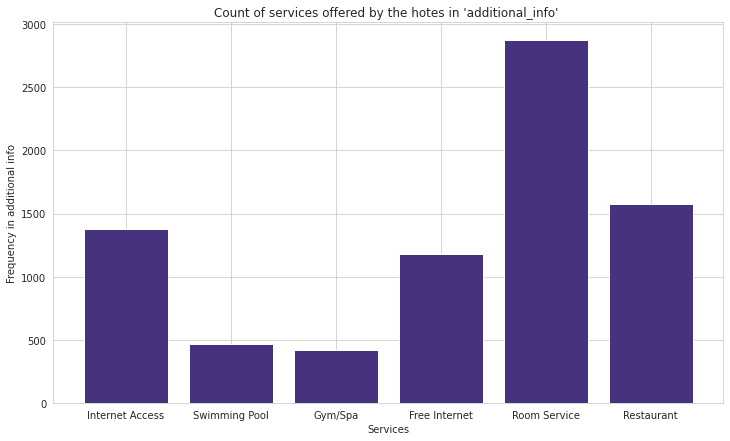

In [ ]:
plt.figure(figsize = (12,7))
plt.bar(word_count.keys(),word_count.values())
plt.title("""Count of services offered by the hotes in 'additional_info' """)
plt.xlabel('Services')
plt.ylabel('Frequency in additional info')

In [ ]:
freq = []
for x in df['additional_info']:
  try:
    x = len(x.split('|'))
  except:
    continue
  freq.append(x)

freq_count={}
for i in set(freq):
  freq_count[i] = freq.count(i)
freq_count

{1: 1025, 2: 707, 3: 710, 4: 481, 5: 215, 6: 54}

<BarContainer object of 6 artists>

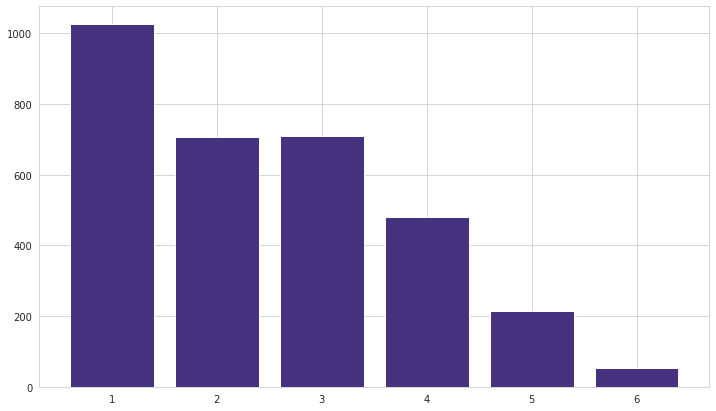

In [ ]:
plt.figure(figsize = (12,7))
plt.bar(freq_count.keys(), freq_count.values())

### 'area'

In [ ]:
df['area'].nunique()

1415

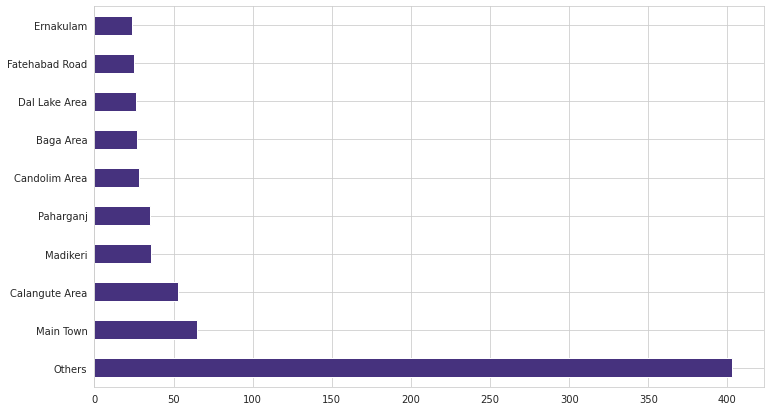

In [ ]:
df['area'].value_counts().head(10).plot.barh(figsize = (12,7))

In [ ]:
df['area'].isnull().sum()

35

In [ ]:
df[df['area'] == 'Main Town']['city']

73         Munnar
132     Panchgani
180        Munnar
195      Tirupati
256        Shimla
          ...    
3632    Panchgani
3684    Pachmarhi
3832    Panchgani
3852    Panchgani
3927       Munnar
Name: city, Length: 65, dtype: object

## city

In [ ]:
df['city'].nunique()

558

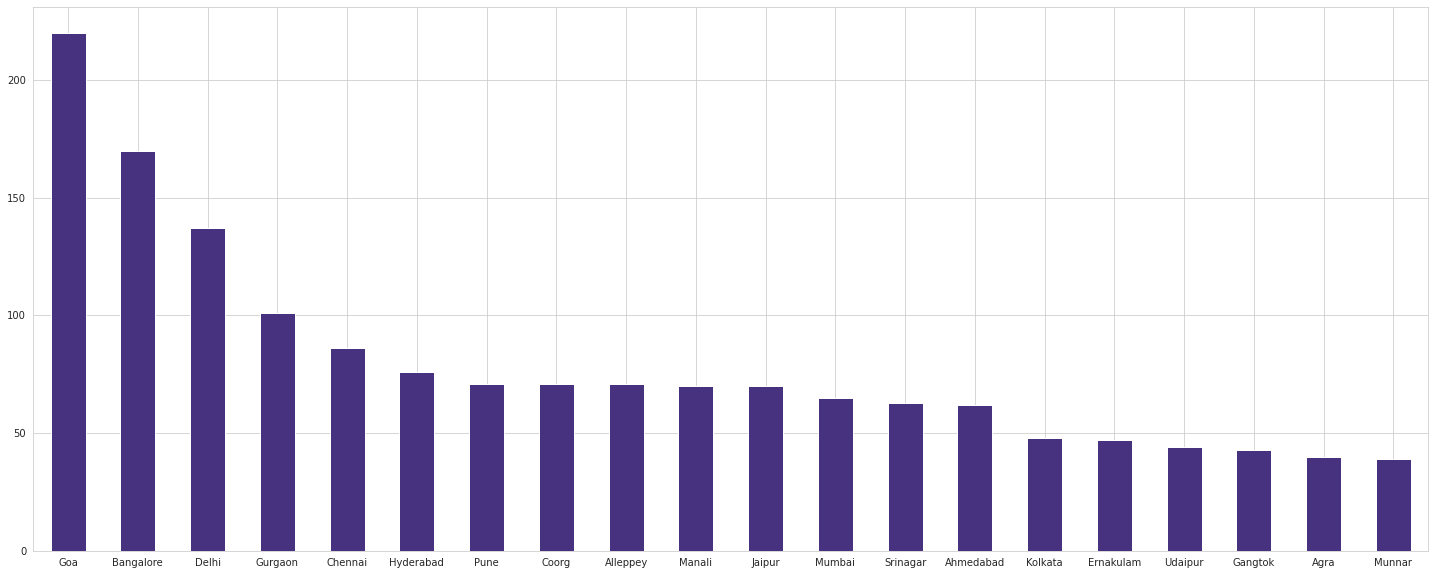

In [ ]:
df['city'].value_counts().head(20).plot(kind = 'bar', rot = 0, figsize = (25,10))

## guest_recommendation

How many guests that stayed here have recommended this hotels to others on the site.

In [ ]:
df['guest_recommendation'].nunique()

70

In [ ]:
df['guest_recommendation'].unique()

array([ 85.,  87.,  50., 100.,  63.,  68.,  nan,  76.,   0.,  90.,  92.,
        67.,  84.,  97.,  16.,  74.,  83.,  66.,  69.,  72.,  75.,  70.,
        91.,  93.,  79.,  78.,  44.,  61.,  89.,  95.,  58.,  64.,  81.,
        71.,  77.,  45.,  80.,  82.,  42.,  94.,  56.,  27.,  33.,  73.,
        60.,  88.,  59.,  35.,  40.,  25.,  57.,  32.,  54.,  86.,  62.,
        52.,  96.,  28.,  55.,  53.,  43.,  65.,  37.,  51.,  30.,  38.,
        39.,  47.,  34.,  41.,  46.])

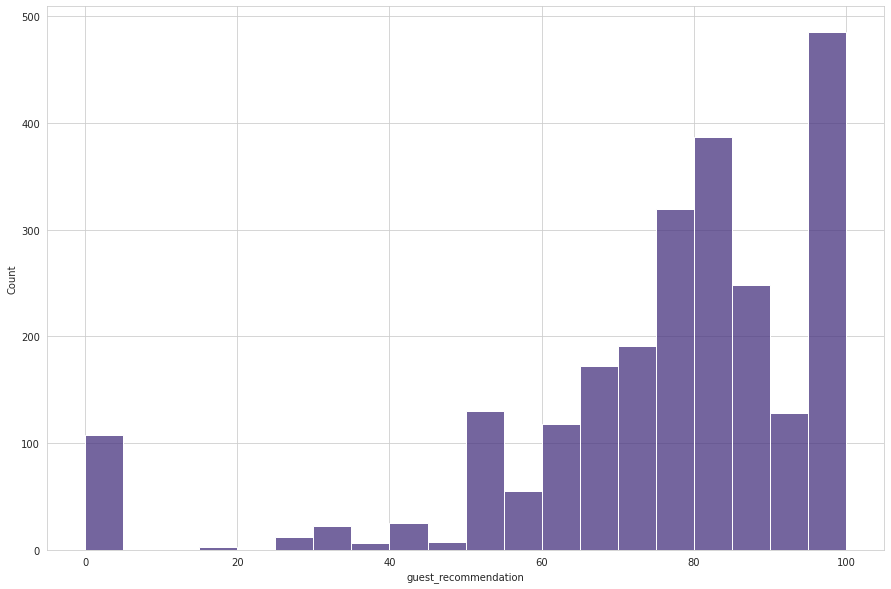

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(df['guest_recommendation'], bins = 20)

In [ ]:
df.columns

Index(['additional_info', 'address', 'area', 'city', 'guest_recommendation',
       'hotel_brand', 'hotel_category', 'hotel_description',
       'hotel_facilities', 'hotel_star_rating', 'image_count', 'latitude',
       'locality', 'longitude', 'point_of_interest', 'property_name',
       'property_type', 'province', 'review_count_by_category', 'room_area',
       'room_count', 'room_facilities', 'room_type', 'similar_hotel',
       'site_review_count', 'site_review_rating', 'site_stay_review_rating',
       'state'],
      dtype='object')

## hotel_brand

In [ ]:
df['hotel_brand'].nunique()

95

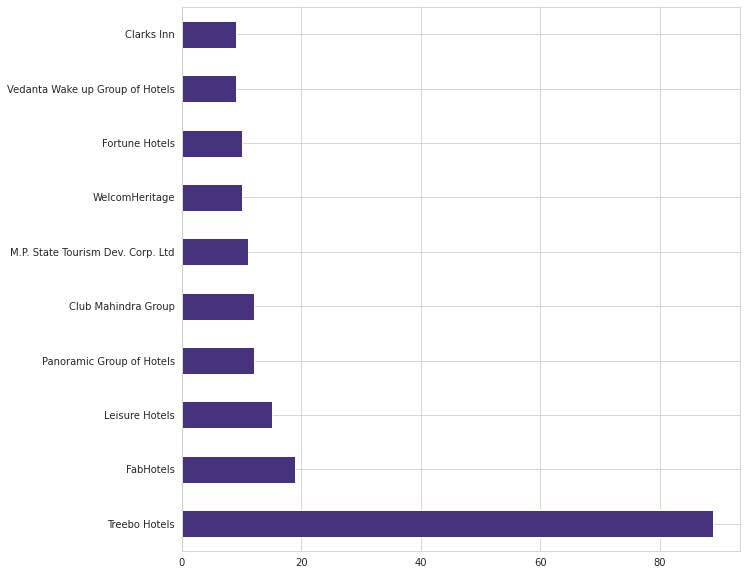

In [ ]:
df['hotel_brand'].value_counts().head(10).plot(kind = 'barh', figsize = (10,10))

Treebo Hotels have overwhelming representation in hotel brands. 

## hotel_category

In [ ]:
df['hotel_category'].unique()

array(['gostays', 'regular'], dtype=object)

In [ ]:
df['hotel_category'].value_counts()

regular    3871
gostays     129
Name: hotel_category, dtype: int64

From GoIbibo website:

"GoStays are handpicked certified quality hotels by Goibibo. They are specially categorized budget hotels with amenities like free WiFi, breakfast, AC, TV, and clean washrooms."

## hotel_description

In [ ]:
df['hotel_description'].head(3)

0    The standard check-in time is 12:00 PM and the...
1    The standard check-in time is 12:00 PM and the...
2    The standard check-in time is 12:00 PM and the...
Name: hotel_description, dtype: object

In [ ]:
len(df['hotel_description'].iloc[2344].split())

205

Lets see the length of hotel_description

In [ ]:
len_of_desc = []
for x in df.hotel_description.values:
  try:
    len_of_desc.append(len(x.split()))
  except:
    continue

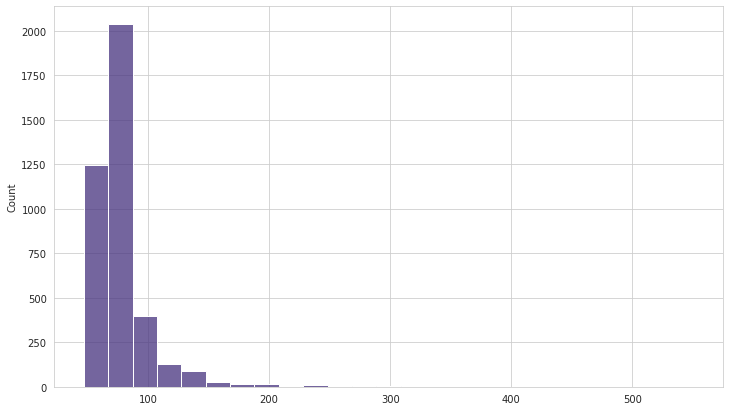

In [ ]:
plt.figure(figsize = (12,7))
sns.histplot(len_of_desc, bins = 25)

In [ ]:
print('Max length of description: ',max(len_of_desc))
print('Min length of description: ', min(len_of_desc))
print('Mean length : ', np.mean(len_of_desc))

Max length of description:  550
Min length of description:  47
Mean length :  77.45769520461964


## hotel_facilities

In [ ]:
df['hotel_facilities'].unique()

array(["Doctor on Call|Dry Cleaning|Laundry Service Available|Lobby|Parking Facilities Available|Gardens|Dance Performances (on demand)|Catering|Multi Lingual Staff|Wake-up Call / Service|Suitable For Children|Kitchen available (home cook food on request)|Open Air Restaurant / Dining |Veg / Non Veg Kitchens Separate |Vegetarian Food / Jain Food Available|Car Rental|Taxi Services|Food Facility|Internet Access Free|Children's Park|Postal / Parcel Services| Cook Services|Air / Rail Booking|Courier Service|Guide / Sightseeing Service|Internet / Fax (Reception area only)|RO Water Purification System|Parking Facility|Internet Access|Restaurant|Room Service|Fire Exit Signs|Full Time Operation for All 7 Days|Porter Services Available|Security at All Hotel Entrances|Suites",
       'Airport Transfer Available / Surcharge|Banquet Facilities|Business Center |Currency Exchange|Doctor on Call|Health Club / Gym Facility Available|Laundry Service Available|Lift / Elevator|Lobby|Parking Facilities Ava

In [ ]:
services = []
word_list = []
for x in df['hotel_facilities'].values:
  try:
    words = x.split('|')
  except:
    continue
  services.append(words)
  for i in words:
    word_list.append(i)

In [ ]:
unique_services = set(word_list)

In [ ]:
word_count = dict()
for i in unique_services:
  #print('Word count of {} = {}'.format(i, word_list.count(i)))
  word_count[i] = word_list.count(i)

Word count of Fire Safety = 471
Word count of 24-hour Business Centre = 5
Word count of Printing = 1
Word count of Currency Exchange = 551
Word count of Ayurvedic Facilities = 7
Word count of Beauty Salon - on charge = 99
Word count of Baggage Room = 504
Word count of Basketball Court  = 23
Word count of Self Check - In = 43
Word count of Casino = 7
Word count of Table Tennis = 124
Word count of Scanning services = 5
Word count of Scanning = 1
Word count of Shops in vicinity = 2
Word count of Travel &amp; Tours desk = 6
Word count of Portable Play Station in select cars = 1
Word count of Karaoke  = 46
Word count of Handicapped Facilities = 7
Word count of Sight-Seeing = 1
Word count of Fax = 1
Word count of Golf Course = 21
Word count of Multi Cuisine Restaurant  = 1366
Word count of Local Tour / Travel Desk = 1256
Word count of Ayurvedic Facilities  = 42
Word count of Yoga sessions on request and are chargeable = 1
Word count of Virtual Golf = 2
Word count of Indoor games = 2
Word cou

In [ ]:
service_df = pd.DataFrame.from_dict(word_count, orient = 'index')

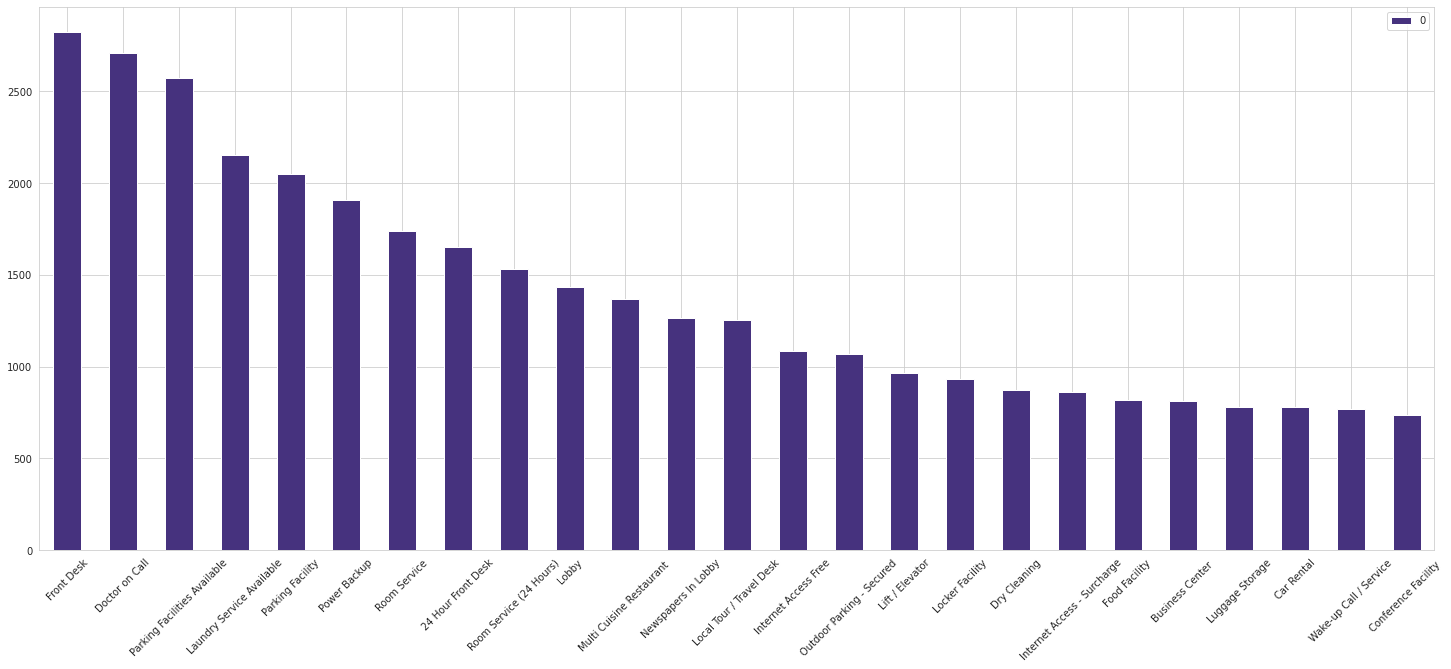

In [ ]:
service_df.sort_values(by = 0, ascending=False).head(25).plot(kind = 'bar', figsize = (25,10), rot = 45)

hotel_star_rating

In [ ]:
df['hotel_star_rating'].unique()

array([2, 0, 3, 1, 4, 5])

<BarContainer object of 6 artists>

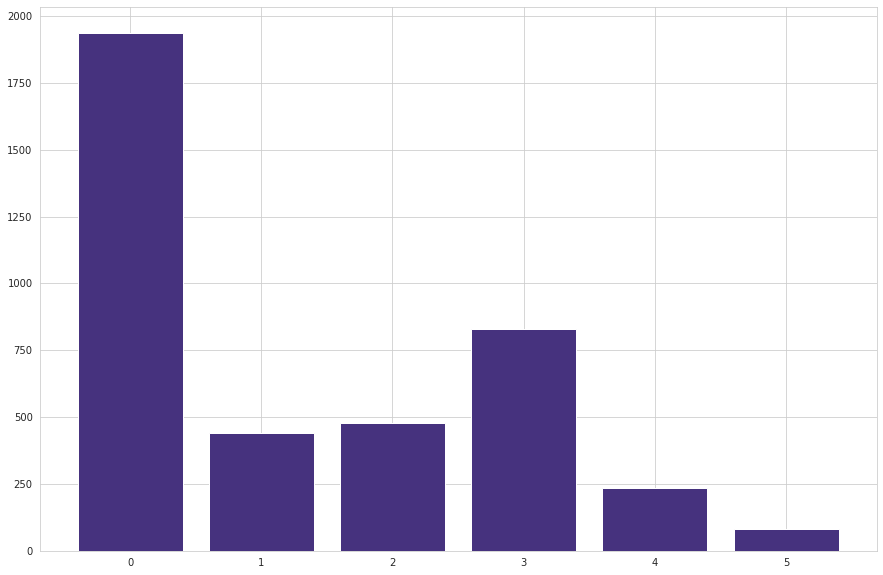

In [ ]:
plt.figure(figsize = (15,10))
plt.bar(x = df['hotel_star_rating'].value_counts().index, height = df['hotel_star_rating'].value_counts().values )

## 'point_of_interest'

In [141]:
df['point_of_interest'].nunique()

3050

In [147]:
points = []
for x in df['point_of_interest'].values:
  try:
    point = x.split('|')
  except:
    continue
  for i in point:
    points.append(i)

In [148]:
unique_points = set(points)
print('No of unique points: ', len(unique_points))

No of unique points:  5188


In [155]:
point_count = dict()
for i in unique_points:
  point_count[i] = points.count(i)


Streaming output truncated to the last 5000 lines.
Word count of Hinjewadi = 3
Word count of Bonemill Bus Stop = 2
Word count of Dandi = 1
Word count of Largo of St Francis Xavier = 1
Word count of Delhi National Railway Museum = 1
Word count of Kandivali Railway Station = 3
Word count of Bharat Nagar MMTS Station = 1
Word count of Ranikhet Market = 1
Word count of Hebbal = 5
Word count of Hydraulic Research Station = 1
Word count of Chilka Lake = 1
Word count of Colaba Causeway = 1
Word count of Jantar Mantar = 95
Word count of Thiruvananthapuram Central Railway Station = 9
Word count of Ooty Main Road = 2
Word count of South City Mall = 1
Word count of Calangute Shopping Area = 2
Word count of Kasauni Town = 1
Word count of Vandanmedu = 1
Word count of Dalai Lama Temple = 1
Word count of Thakurbari Temple and Dharamshala = 26
Word count of Lal Bagh Botanical Gardens = 2
Word count of Max Super Speciality Hospital = 11
Word count of Haldi Ghati = 1
Word count of Chennai City Centre - 

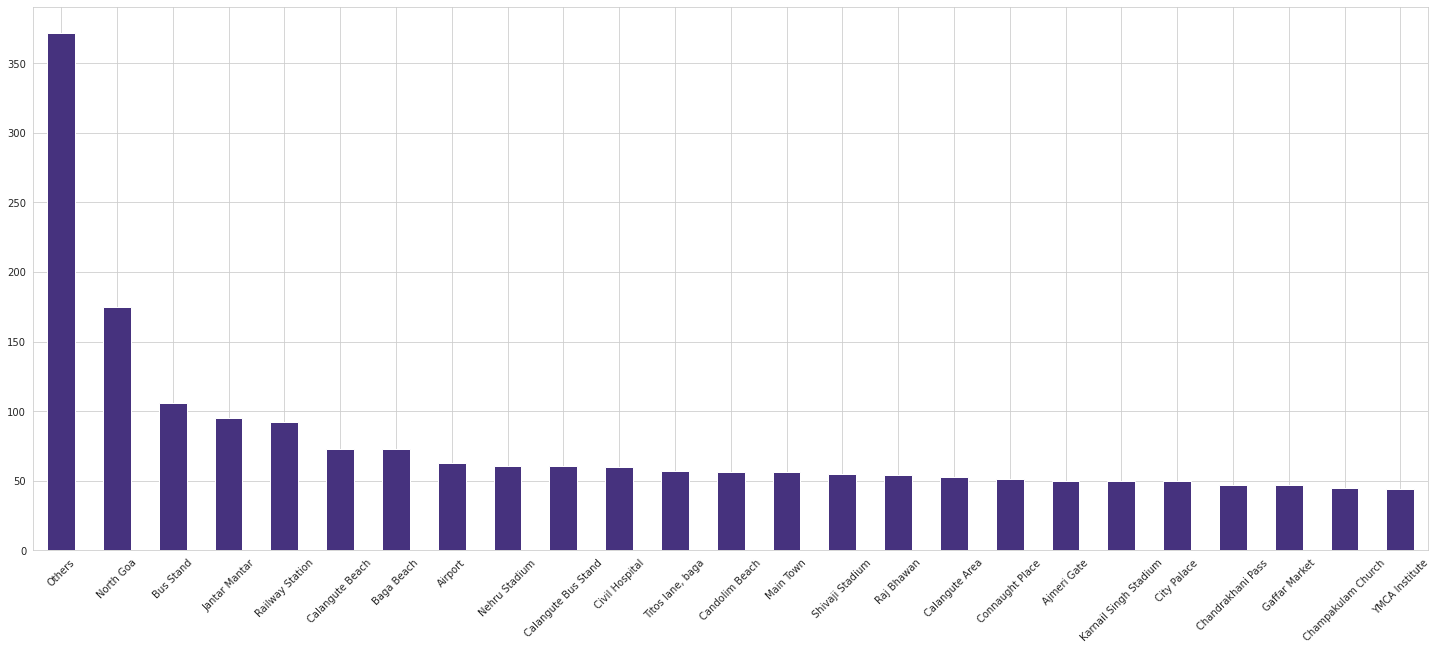

In [159]:
points_df = pd.Series(point_count)
points_df.sort_values(ascending = False).head(25).plot(kind = 'bar', figsize = (25,10), rot = 45)

In [160]:
df.columns

Index(['additional_info', 'address', 'area', 'city', 'guest_recommendation',
       'hotel_brand', 'hotel_category', 'hotel_description',
       'hotel_facilities', 'hotel_star_rating', 'image_count', 'latitude',
       'locality', 'longitude', 'point_of_interest', 'property_name',
       'property_type', 'province', 'review_count_by_category', 'room_area',
       'room_count', 'room_facilities', 'room_type', 'similar_hotel',
       'site_review_count', 'site_review_rating', 'site_stay_review_rating',
       'state'],
      dtype='object')

## review_count_by_category

In [163]:
df['review_count_by_category'].iloc[0]

'positive reviews::74|critical reviews::13|reviews with images::13'

In [174]:
#we will divide the reviews using apply function
def review_count(row):
  try:
    separate = row['review_count_by_category'].split('|')
    row['pos_review'] = int(separate[0].split('::')[1])
    row['neg_review'] = int(separate[1].split('::')[1])
    row['img_review'] = int(separate[2].split('::')[1])
  except:
    row['pos_review'] = np.nan
    row['neg_review'] = np.nan
    row['img_review'] = np.nan
  return row

df = df.apply(review_count, axis = 1)

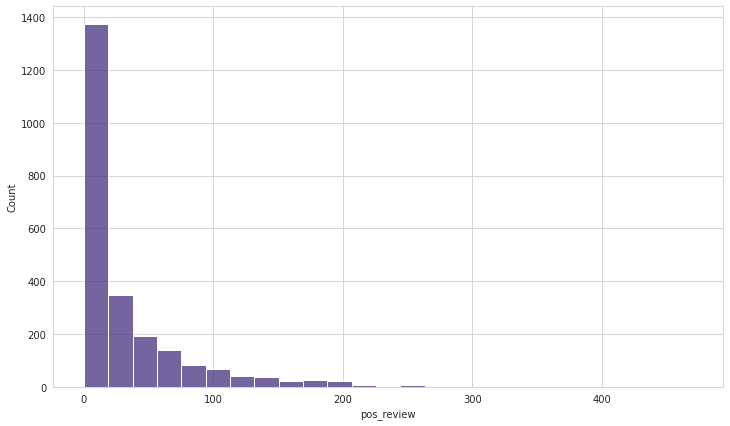

In [180]:
plt.figure(figsize = (12,7))
sns.histplot(df[df['pos_review']<=500]['pos_review'], bins = 25)

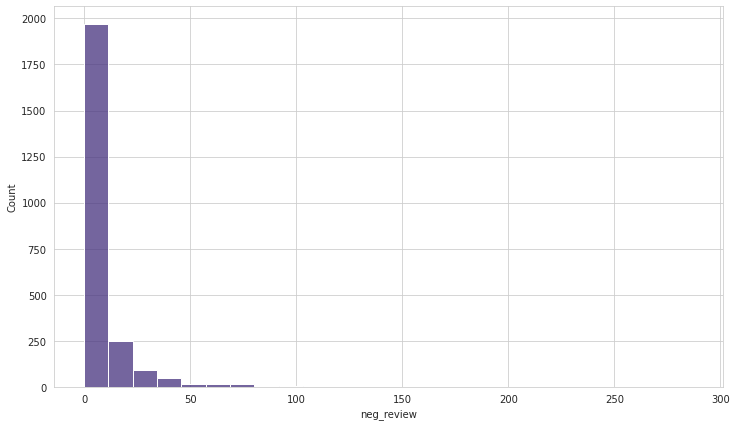

In [181]:
plt.figure(figsize = (12,7))
sns.histplot(df['neg_review'], bins = 25)

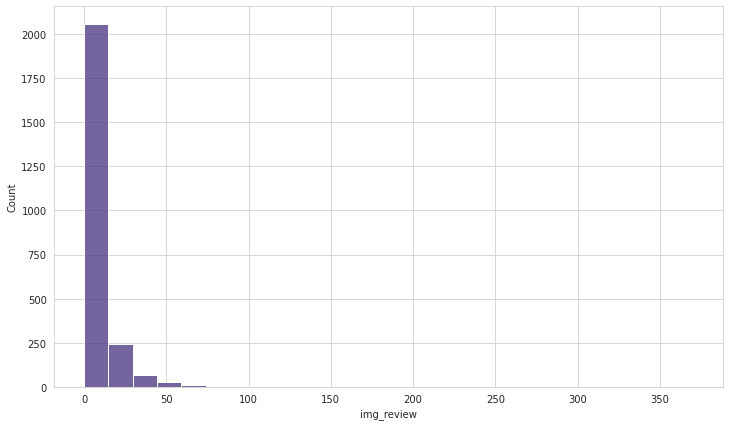

In [182]:
plt.figure(figsize = (12,7))
sns.histplot(df['img_review'], bins = 25)

## site_review_count

In [184]:
df['site_review_count']

0        87.0
1         8.0
2         2.0
3         1.0
4       121.0
        ...  
3995      NaN
3996      NaN
3997     77.0
3998      NaN
3999      2.0
Name: site_review_count, Length: 4000, dtype: float64

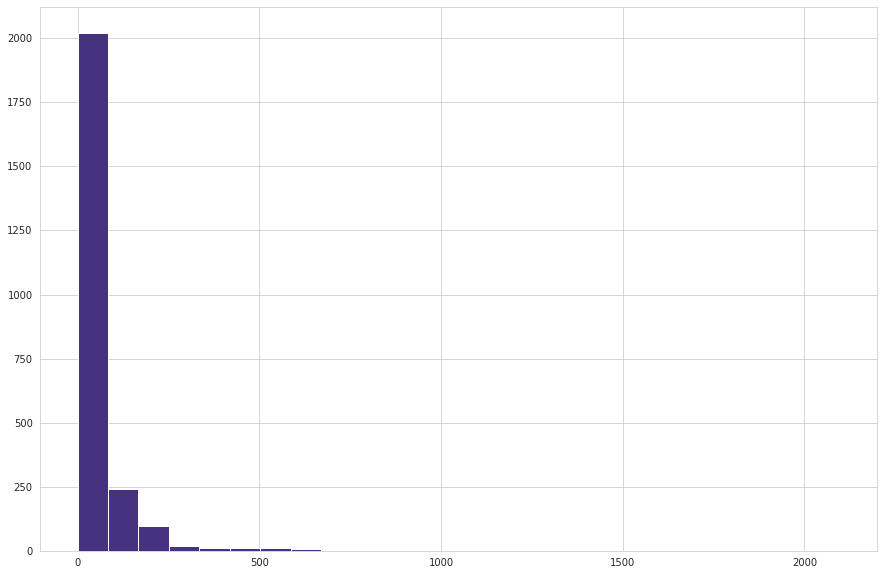

In [187]:
df['site_review_count'].hist(figsize = (15,10),bins= 25)

In [188]:
df.columns

Index(['additional_info', 'address', 'area', 'city', 'guest_recommendation',
       'hotel_brand', 'hotel_category', 'hotel_description',
       'hotel_facilities', 'hotel_star_rating', 'image_count', 'latitude',
       'locality', 'longitude', 'point_of_interest', 'property_name',
       'property_type', 'province', 'review_count_by_category', 'room_area',
       'room_count', 'room_facilities', 'room_type', 'similar_hotel',
       'site_review_count', 'site_review_rating', 'site_stay_review_rating',
       'state', 'pos_review', 'neg_review', 'img_review'],
      dtype='object')

## site_review_rating

In [189]:
df['site_review_rating']

0       4.0
1       4.5
2       2.5
3       5.0
4       2.8
       ... 
3995    NaN
3996    NaN
3997    4.0
3998    NaN
3999    4.3
Name: site_review_rating, Length: 4000, dtype: float64

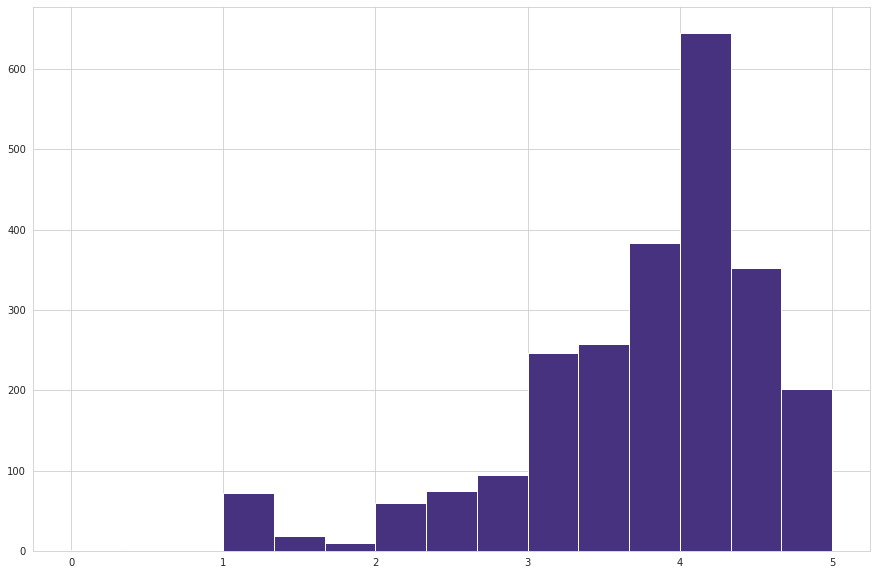

In [191]:
df['site_review_rating'].hist(figsize = (15,10), bins = 15)

## site_stay_review_rating

In [192]:
df['site_stay_review_rating']

0       Service Quality::3.9|Amenities::3.7|Food and D...
1       Service Quality::4.7|Amenities::4.7|Food and D...
2       Service Quality::2.5|Amenities::2.5|Food and D...
3       Service Quality::5.0|Amenities::5.0|Food and D...
4       Service Quality::2.7|Amenities::2.6|Food and D...
                              ...                        
3995    Service Quality::|Amenities::|Food and Drinks:...
3996    Service Quality::|Amenities::|Food and Drinks:...
3997    Service Quality::3.9|Amenities::3.8|Food and D...
3998    Service Quality::|Amenities::|Food and Drinks:...
3999    Service Quality::4.3|Amenities::4.3|Food and D...
Name: site_stay_review_rating, Length: 4000, dtype: object

In [196]:
df['site_stay_review_rating'].iloc[123]

'Service Quality::3.0|Amenities::2.7|Food and Drinks::1.3|Value for Money::3.0|Location::3.8|Cleanliness::2.5'

In [227]:
i = 0
def review_rating(row):
  global i
  reviews = row['site_stay_review_rating'].split('|')
  try:
    if reviews[0].split('::')[0] == 'Service Quality':
      row['Service Quality'] = float(reviews[0].split('::')[1])
  except:
    row['Service Quality'] = np.nan
  try:
    if reviews[1].split('::')[0] == 'Amenities':
      row['Amenities'] = float(reviews[1].split('::')[1])
  except:
    row['Amenities'] = np.nan

  try:
    if reviews[2].split('::')[0] == 'Food and Drinks':
      row['Food and Drinks'] = float(reviews[2].split('::')[1])
  except:
    row['Food and Drinks'] = np.nan
  try:
    if reviews[3].split('::')[0] == 'Value for money':
      row['Value for money'] = float(reviews[3].split('::')[1])
  except:
    row['Value for money'] = np.nan
  try:
    if reviews[4].split('::')[0] == 'Location':
      row['Location'] = float(reviews[4].split('::')[1])
  except:
    row['Location'] = np.nan
  try:
    if reviews[5].split('::')[0] == 'Cleanliness':
      row['Cleanliness'] = float(reviews[5].split('::')[1])
  except:
    row['Cleanliness'] = np.nan
  i = i+1
  return row

In [228]:
df = df.apply(review_rating, axis = 1)

In [240]:
df['Value for money'] = df['Value for money'].replace('', np.nan)

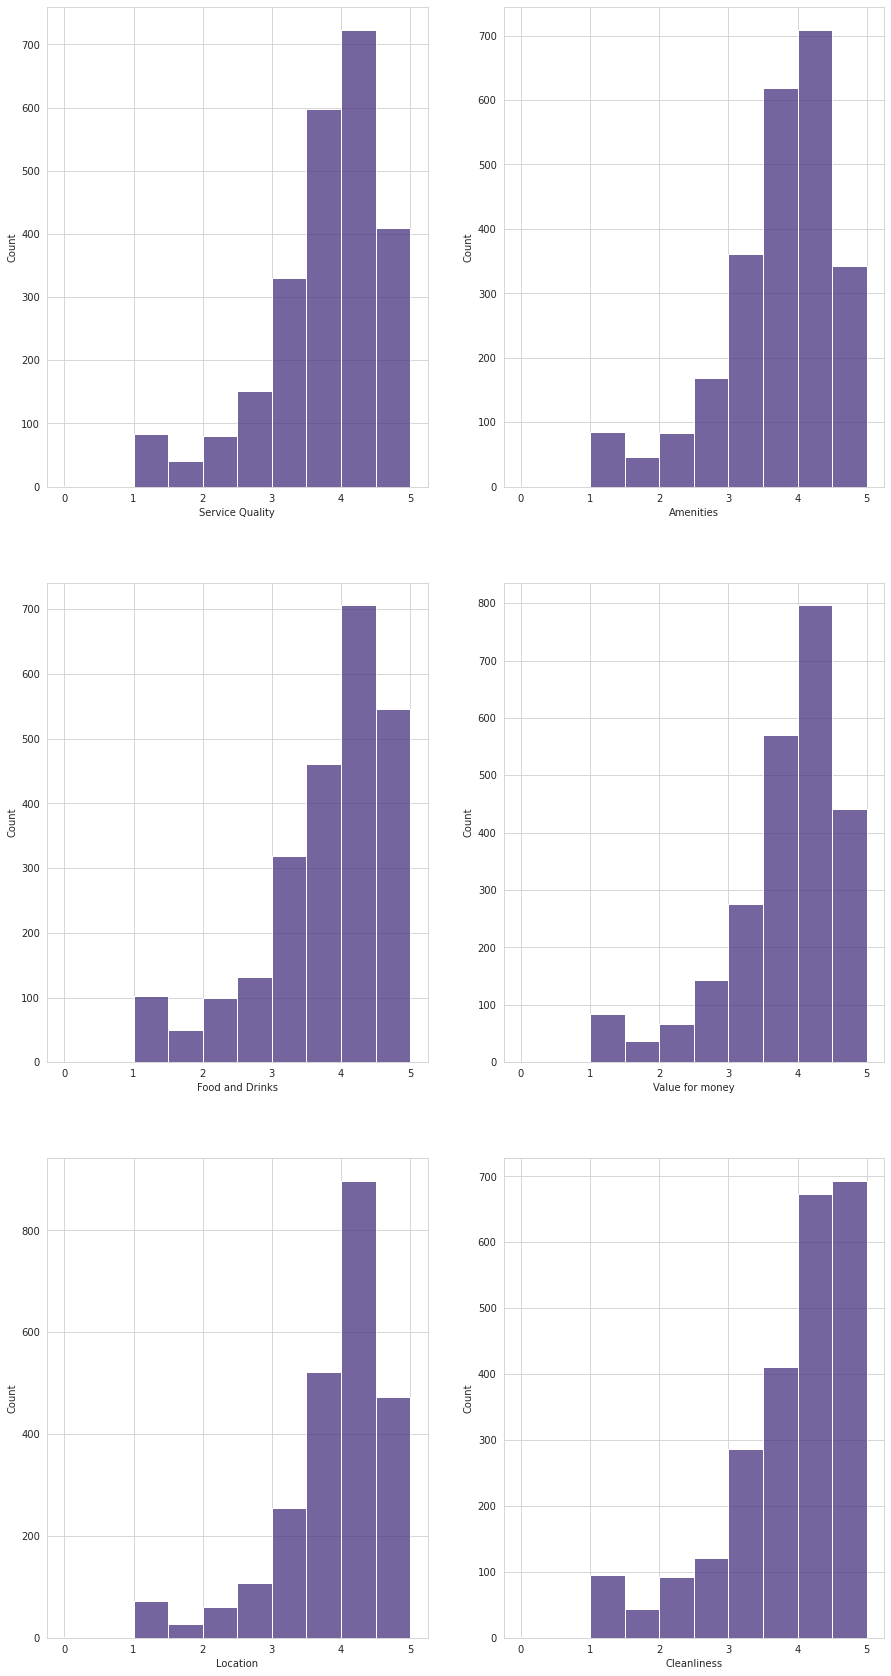

In [242]:
plt.figure(figsize = (15,30))
plt.subplot(3,2, 1)
sns.histplot(df['Service Quality'], bins = 10)

plt.subplot(3,2, 2)
sns.histplot(df['Amenities'], bins = 10)

plt.subplot(3,2, 3)
sns.histplot(df['Food and Drinks'], bins = 10)

plt.subplot(3,2, 4)
sns.histplot(df['Value for money'].astype(float), bins = 10)

plt.subplot(3,2, 5)
sns.histplot(df['Location'], bins = 10)

plt.subplot(3,2, 6)
sns.histplot(df['Cleanliness'], bins = 10)

In [243]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 1.0MB 6.6MB/s 
     |████████████████████████████████| 15.3MB 248kB/s 
     |████████████████████████████████| 6.5MB 31.1MB/s 


In [244]:
import geopandas as gpd

In [245]:
path = "/content/MyDrive/MyDrive/Datasets/GoIbibo India Hotels/India map/Igismap/Indian_States.shp"
map_df = gpd.read_file(path)

In [246]:
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [250]:
map_df.set_index('st_nm', inplace = True)

In [247]:
df.columns

Index(['additional_info', 'address', 'area', 'city', 'guest_recommendation',
       'hotel_brand', 'hotel_category', 'hotel_description',
       'hotel_facilities', 'hotel_star_rating', 'image_count', 'latitude',
       'locality', 'longitude', 'point_of_interest', 'property_name',
       'property_type', 'province', 'review_count_by_category', 'room_area',
       'room_count', 'room_facilities', 'room_type', 'similar_hotel',
       'site_review_count', 'site_review_rating', 'site_stay_review_rating',
       'state', 'pos_review', 'neg_review', 'img_review', 'Service Quality',
       'Amenities', 'Food and Drinks', 'Value for money', 'Location',
       'Cleanliness'],
      dtype='object')

In [258]:
df1 = df[['latitude', 'longitude', 'state']]

In [259]:
df1 = df1.groupby('state')['state'].count()

In [260]:
merged = map_df.join(df1)

In [262]:
merged.fillna(0, inplace = True)

In [263]:
merged

,geometry,state
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",22.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",34.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",0.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",20.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",0.0
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",0.0
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",221.0


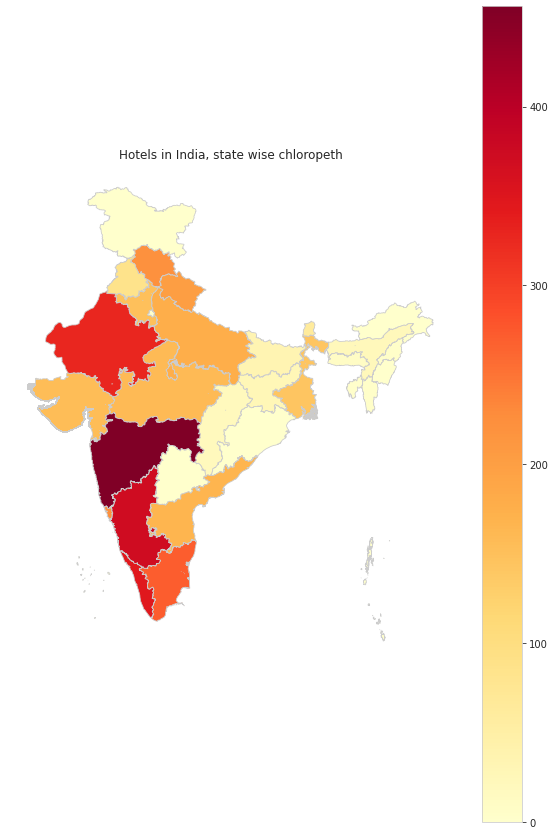

In [269]:
fig, ax = plt.subplots(1, figsize=(10, 15))
ax.axis('off')
ax.set_title('Hotels in India, state wise chloropeth')
merged.plot(column='state', cmap='YlOrRd', linewidth=0.8,  edgecolor='0.8', legend=True, ax=ax)